订单数与服务区热力数据的相关性系数: 0.9586777805841652
标准化后两列数据的 R^2 分数: 0.9173555611683302


C:\Users\11473\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\11473\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

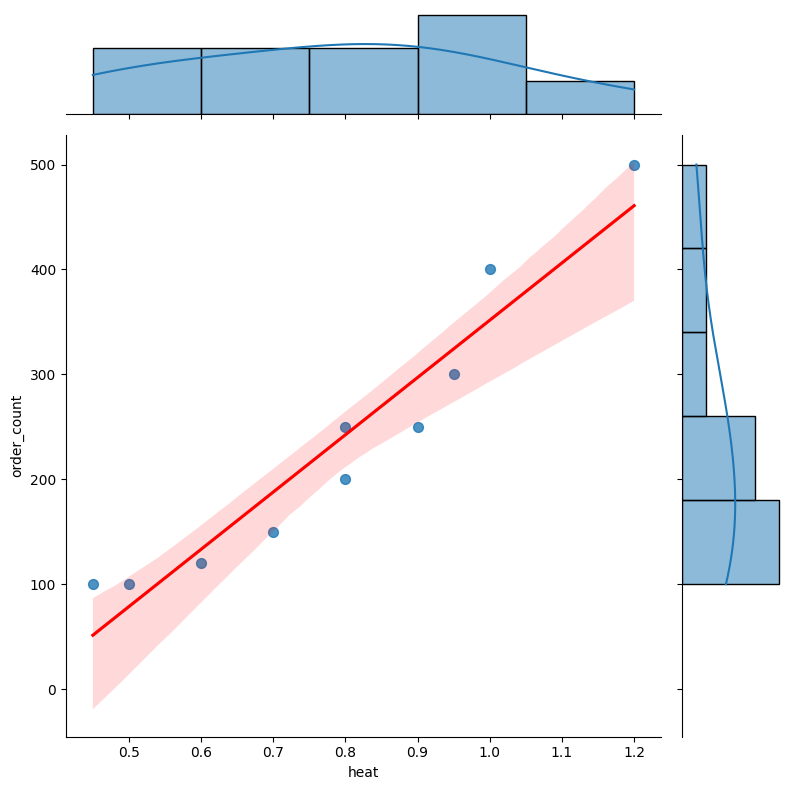

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 假设你已经有一个DataFrame，名为df，包含两列：'order_count', 'heat'
# 我将创建一个示例DataFrame，你可以替换为你自己的数据
df = pd.DataFrame({
    'order_count': [100, 150, 200, 250, 120, 300, 400, 500, 250, 100],
    'heat': [0.5, 0.7, 0.8, 0.9, 0.6, 0.95, 1.0, 1.2, 0.8, 0.45]
})

# 分析相关性
correlation = df['order_count'].corr(df['heat'])
print(f"订单数与服务区热力数据的相关性系数: {correlation}")

# 标准化数据
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=['order_count', 'heat'])

# 计算标准化后的 R^2 分数
r2_scaled = r2_score(df_scaled['order_count'], df_scaled['heat'])
print(f"标准化后两列数据的 R^2 分数: {r2_scaled}")

# 绘制散点的拟合图
plt.figure(figsize=(10, 6))
sns.jointplot(x='heat', y='order_count', data=df, kind='reg', height=8, scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.show()

In [2]:
# 分离特征和目标变量
X = df[['heat']]  # 特征：热力数据
y = df['order_count']  # 目标：订单数

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 预测测试集订单数
y_pred = rf.predict(X_test)

# 评估模型表现
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"随机森林模型的均方误差 (MSE): {mse}")
print(f"随机森林模型的 R^2 分数: {r2}")

随机森林模型的均方误差 (MSE): 595.8849999999999
随机森林模型的 R^2 分数: 0.761646
